In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
import torch
import torchvision
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision.utils import save_image
import os
if not os.path.exists('./img'):
    os.mkdir('./img')

In [2]:
with np.load('dimredux-challenge-01-data.npz') as fh:
    data_x = fh['data_x']
    validation_x = fh['validation_x']
    validation_y = fh['validation_y']
    
#Training data
print(data_x.shape)
#validation data
print(validation_x.shape)
#validation data, metastable states
print(validation_y.shape)

(100000, 3)
(1000, 3)
(1000,)


<IPython.core.display.Javascript object>


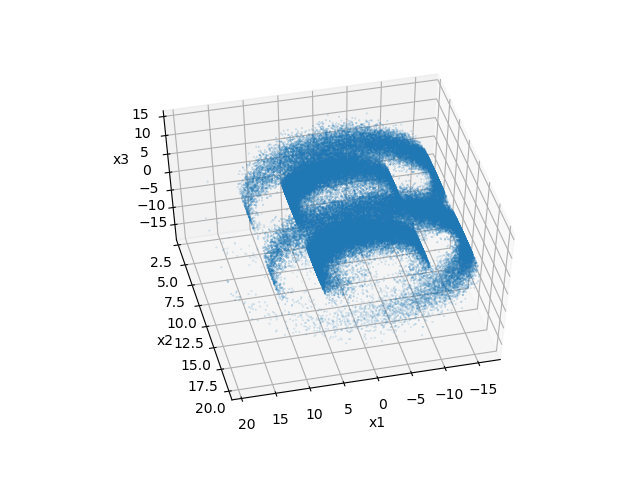

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_x[:,0], data_x[:,1], data_x[:,2],marker='.',s=0.1)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
plt.show()

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xs=validation_x[:,0]
ys=validation_x[:,1]
zs=validation_x[:,2]
a=zip(validation_y==0,
      validation_y==1,
      validation_y==2,
      validation_y==3)
c=np.empty(validation_y.shape,dtype='<U1')
for index,cs in enumerate(a):
    if cs[0]:
        c[index]='b'    
    if cs[1]:
        c[index]='g'
    if cs[2]:
        c[index]='c'
    if cs[3]:
        c[index]='r'ax.scatter(xs,ys,zs,marker='.',s=10,c=c)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
plt.show()

SyntaxError: invalid syntax (<ipython-input-56-f7e513be60ed>, line 6)

<IPython.core.display.Javascript object>


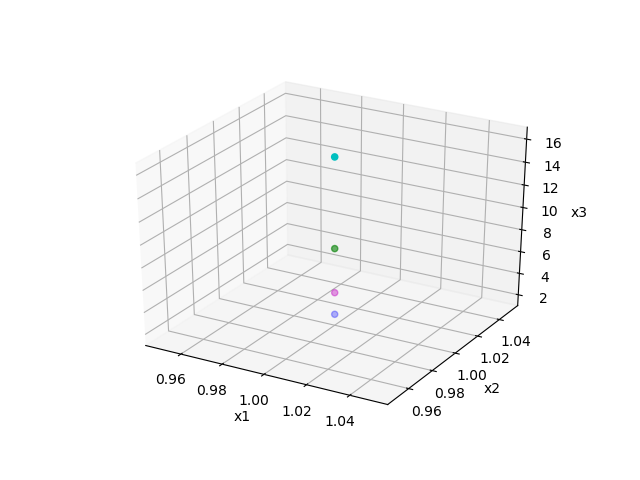

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xs=[1,1,1,1]
ys=[1,1,1,1]
zs=[2,4,8,16]
ax.scatter(xs,ys,zs,marker='o',c=['b','m','g','c'])
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
plt.show()

In [39]:
validation_y.shape

(1000,)

In [57]:
a=zip(validation_y==0,
      validation_y==1,
      validation_y==2,
      validation_y==3)
c=np.empty(validation_y.shape,dtype='<U1')
for index,cs in enumerate(a):
    if cs[0]:
        c[index]='b'    
    if cs[1]:
        c[index]='g'
    if cs[2]:
        c[index]='c'
    if cs[3]:
        c[index]='r'

array(['a', 'b'], dtype='<U1')